In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import librosa
import os
# import seaborn as sns


In [2]:
def half_rectify(n):
    return np.fmax(n, np.zeros_like(n))

In [35]:
def spectral_flux(spec):
    """
    Computes the spectral flux of a spectrogram
    :param spec: a 2-D array of floats
    :return: a numpy array
    """
    return np.expand_dims(np.sum(np.square(half_rectify(np.absolute(spec[:, 1:]) -
                                         np.absolute(spec[:, :-1]))), 0), axis=0)

In [4]:
import sklearn.neighbors as nbrs
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

sample_dirs = ["../audio/samples/onsets/ALFRED/", "../audio/samples/onsets/DANBY/"]

# clf_KNN = nbrs.KNeighborsClassifier(n_neighbors=5)
# clf_SVM = SVC()
# clf_forest = RandomForestClassifier()
clf_SGD = SGDClassifier(loss='log', penalty='l1', verbose=1)

# clfs = [clf_KNN, clf_SVM, clf_forest, clf_SGD]
clfs = [clf_SGD]

In [5]:
# Audio params

# filename = "../audio/SBI-1_20090915_234016.wav"
# annotation_path = "../annotations/SBI-1_20090915_HAND_LOW_IDaek_EDITED_with_HIGH.txt"
# model_path = "../features/SBI_coefs_41.npy"

# Load audio and compute spectrogram
sr = 24000.0
n_fft = 256 # =win_length
win_length = n_fft
hop_length = 128
hop_size = hop_length/sr # in seconds
win_size = win_length/sr # in seconds
spec_dt = hop_length/sr # in seconds
truncate = 0
# truncate = 40

# Define length of coefficient window
w_length = 1    # let's just use odd numbered values, ok?

In [6]:
def make_feature(spec, spec_dt, w_length):
#     print spec.shape
    l = spec.shape[1]
    mid = l/2;
    start = mid - np.floor((w_length)/2)
    end = start + w_length
#     print l
    
#     sf = np.square(half_rectify(np.absolute(spec[:, start:end]) -
#                                      np.absolute(spec[:, start-1:end-1])))
    sf = (half_rectify(np.absolute(spec[truncate:, start:end]) -
                                     np.absolute(spec[truncate:, start-1:end-1])))
    return sf.reshape(1, sf.size)

In [7]:
### Test make_feature
# test_1 = "../audio/samples/onsets/ALFRED/true_149631.wav"
# test_2 = "../audio/samples/onsets/ALFRED/true_209347.wav"

# y, _ = librosa.load(test_2, sr=sr)
# spec = np.abs(librosa.core.stft(y, n_fft=n_fft, hop_length=hop_length))

# l = spec.shape[1]
# mid = l/2;
# start = mid - np.floor((5)/2)
# end = start + 5
# #     print l
    
# #     sf = np.square(half_rectify(np.absolute(spec[:, start:end]) -
# #                                      np.absolute(spec[:, start-1:end-1])))
# sf = (half_rectify(np.absolute(spec[:, start:end]) -
#                                      np.absolute(spec[:, start-1:end-1])))

# sff = sf.reshape(1, sf.size)

In [8]:
# plt.figure(figsize=(20,10))
# # plt.imshow(spec)
# # plt.plot(sf)
# plt.imshow(spec[40:, start:end])

# # plt.imshow(spec[40:, start-1:end-1])

In [10]:
# Train
import random

for sample_dir in sample_dirs:
        d = os.listdir(sample_dir)
#         d = random.shuffle(os.listdir(sample_dir))
#         random.shuffle(d)
#         for f in random.sample(d, len(d)): # randomize
        for f in d:
            if f[-4:] != '.wav':
                continue
            y, _ = librosa.load(sample_dir + f, sr=sr)

            spec = np.abs(librosa.core.stft(y, n_fft=n_fft, hop_length=hop_length))
            feature = make_feature(spec, spec_dt, w_length)

#             print feature
            if f[0] == 't':
                label = np.asarray([1])
            elif f[0] == 'f':
                label = np.asarray([0])
            else:
                print "BAD FILENAMES!"
                exit()
            print feature.shape
            for clf in clfs:
#                 print feature.shape
#                 print label
#                 print feature[0]
                clf.partial_fit(feature, label, classes=[0,1])
return clfs

(1, 129)
-- Epoch 1
Norm: 299.02, NNZs: 129, Bias: 83.686499, T: 1, Avg. loss: 0.000000
Total training time: 0.00 seconds.
(1, 129)
-- Epoch 1
Norm: 297.45, NNZs: 129, Bias: 81.454855, T: 1, Avg. loss: 394.905954
Total training time: 0.00 seconds.
(1, 129)
-- Epoch 1
Norm: 297.44, NNZs: 129, Bias: 81.454855, T: 1, Avg. loss: 0.000000
Total training time: 0.00 seconds.
(1, 129)
-- Epoch 1
Norm: 297.44, NNZs: 129, Bias: 81.454855, T: 1, Avg. loss: 0.000000
Total training time: 0.00 seconds.
(1, 129)
-- Epoch 1
Norm: 297.44, NNZs: 129, Bias: 81.454855, T: 1, Avg. loss: 0.000000
Total training time: 0.00 seconds.
(1, 129)
-- Epoch 1
Norm: 297.44, NNZs: 129, Bias: 81.454855, T: 1, Avg. loss: 0.000000
Total training time: 0.00 seconds.
(1, 129)
-- Epoch 1
Norm: 297.44, NNZs: 129, Bias: 81.454855, T: 1, Avg. loss: 0.000000
Total training time: 0.00 seconds.
(1, 129)
-- Epoch 1
Norm: 297.43, NNZs: 129, Bias: 81.454855, T: 1, Avg. loss: 0.000000
Total training time: 0.00 seconds.
(1, 129)
-- Ep

/Users/Fuzz/Documents/Coding/ipykernel/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Fuzz/Documents/Coding/ipykernel/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


SyntaxError: 'return' outside function (<ipython-input-10-5aab7417f42c>, line 31)

SGDClassifier(alpha=0.0001, class_weight=None, epsilon=0.1, eta0=0.0,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='log', n_iter=5, n_jobs=1, penalty='l1', power_t=0.5,
       random_state=None, shuffle=False, verbose=1, warm_start=False)
1
(1, 129)


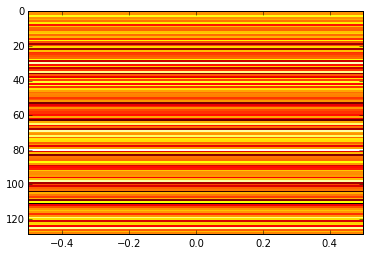

In [11]:
model = clfs[0]
print model
print w_length
coefs2 = model.coef_.reshape((n_fft/2 + 1, w_length))
# coefs2 = model.coef_.reshape((w_length, n_fft/2 + 1))
coefs = model.coef_
# print coefs
# print model.coef_.shape
# np.save(model_path, coefs)
# print np.nonzero(actual_labels)
# print len(actual_labels)
# print np.sum(coefs)
print coefs.shape
plt.imshow((coefs2), interpolation='nearest', aspect='auto', cmap='hot')

In [12]:
np.argmax(coefs)

80

In [13]:
# Iterate through signal by large blocks (constrained by RAM)
num_hops_per_block = 10000
duration = 3000          #seconds
block_size = hop_size*num_hops_per_block
block_len = num_hops_per_block-w_length+2

In [31]:
def make_feature_set(spec, spec_dt, annotation_path, w_length):
    """
    Generates features and labels from spectrogram.
    :param spec: NxM numpy array
    :param spec_dt: float
    :param annotation_path: String
    :param w_length: int
    :return: features, labels
    """
    if annotation_path is not None:
        df = pd.read_csv(annotation_path, header=None, 
            names=['onsets', 'offsets', 'label'], delimiter='\t')
        onsets = np.asarray(df['onsets'])
        offsets = np.asarray(df['offsets'])

    num_features = spec.shape[1]-w_length+1

    # Generate features
    features = [[]] * num_features
    for i in xrange(num_features):
    	features[i] = np.ravel(spec[:, i:i+w_length])

    # Generate labels
    if annotation_path is not None:
        labels = np.zeros(num_features)
#         for on, off in zip(onsets, offsets):
        for on in onsets:
#             center = (on+off)/2
#             start = int(np.round((center-0.100)/spec_dt))
#             finish = int(np.round((center+0.100)/spec_dt))
            start = int(np.round((on-0.100)/spec_dt))
            finish = int(np.round((on+0.100)/spec_dt))
            labels[start:finish+1] = 1
        return np.asarray(features).T, labels

    return np.asarray(features).T

Testing next block... i=0 1045.630369
(1, 129)
(129, 10000)
(1, 10000)
Testing next block... i=1 1046.139779
(1, 129)
(129, 10000)
(1, 10000)
Testing next block... i=2 1053.456252
(1, 129)
(129, 10000)
(1, 10000)
Testing next block... i=3 1067.787694
(1, 129)
(129, 10000)
(1, 10000)
Testing next block... i=4 1089.571201
last one!
0.00533333333333


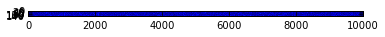

In [79]:
####################################################
# Evaluate model
# test_path = '../audio/NSDNS_20110902_192900.wav'
# detection_curve_path = '../detection_functions/NSDNS_SF_51_test.npy'
test_path = '../audio/ALFRED_20110924_183200.wav'
detection_curve_path = '../detection_functions/ALFRED_SF_50_test.npy'

# coefs = np.load(model_path)
# c = coefs.reshape(645,1)
block_i = 0
duration = None          #seconds
done = False
detection_curve = np.zeros((1,0))

block_len = num_hops_per_block-w_length+2

sf_res = False
test_res = False
while not done:
    print "Testing next block... i={} ".format(block_i) + str(time.clock())
    offset = block_i*block_len
    y, _ = librosa.load(test_path, offset=offset, duration=block_size, sr=sr)
    if len(y) < block_size*sr or (duration is not None and offset > duration):
        print "last one!"
        # BAD!!! Throwing out last bit of data
        break
        done = True
    D = np.abs(librosa.core.stft(y, n_fft=n_fft, hop_length=hop_length))

    features = np.asarray(make_feature_set(D, spec_dt, annotation_path=None, 
        w_length=w_length))

    actual_features = np.square(half_rectify(np.absolute(features[:, 1:]) -
                                     np.absolute(features[:, :-1])))
#     actual_features = (half_rectify(np.absolute(features[1:, truncate:]) -
#                                      np.absolute(features[:-1, truncate:])))
    
#     features = features.T
#     print features.shape
    
    # Template detector
    # detection_curve = np.concatenate((detection_curve,features.dot(c)), axis=1)

    # Multi-frame SF
    print coefs.shape
    print actual_features.shape
    print np.dot(coefs, actual_features).shape
    plt.imshow(features[:1000,:])
    test_coefs = np.ones_like(coefs)
#     detection_curve = np.concatenate((detection_curve,np.dot(coefs, actual_features.T)), axis=1)
#     detection_curve = np.concatenate((detection_curve, np.dot(test_coefs, actual_features)), axis=1)
#     print spectral_flux(features).shape
#     detection_curve = np.concatenate((detection_curve, spectral_flux(features)), axis=1)
    detection_curve = np.concatenate((detection_curve, spectral_flux(D)), axis=1)
#     detection_curve = spectral_flux(features)

#     sf_res = spectral_flux(features)
#     test_res = np.dot(test_coefs, actual_features)
#     assert np.all(np.dot(test_coefs, actual_features) == spectral_flux(features))
    
    
    block_i += 1

# np.save(detection_curve_path, detection_curve.T)

print spec_dt

(1, 10000)
(1, 10000)
-4.15321729008e-07
2.96666257782e-07


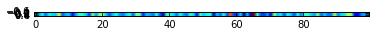

In [45]:
print test_res.shape
print sf_res.shape

diff_res = test_res-sf_res
print np.min(diff_res)
print np.max(diff_res)
plt.imshow(diff_res[:,:100])

In [55]:
print detection_curve.shape
print detection_curve[:10]
# print detection_curve[0,:]
# np.save(detection_curve_path, detection_curve[0,:])

(1, 10000)
[[ 0.14088638  0.04343197  0.40954581 ...,  0.0790174   0.10973996
   0.1315773 ]]


In [72]:
print detection_curve.shape
print detection_curve[:10]

(1, 10000)
[[ 0.1408864   0.04343197  0.40954593 ...,  0.07901741  0.10973996
   0.13157731]]


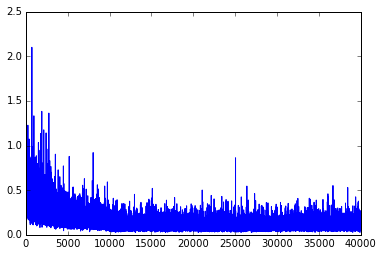

In [80]:
# detection_curve = detection_curve[1:]
# detection_curve -= min(detection_curve)
# detection_curve /= max(detection_curve)
plt.plot(detection_curve.ravel())
# onsets = np.nonzero(actual_labels)
# plt.plot([onsets[0],onsets[0]], [-40,40], 'r')
plt.show()

In [78]:
np.argmax(detection_curve)

24266

In [24]:
actual_labels[6280:6295]
np.nonzero(actual_labels)

NameError: name 'actual_labels' is not defined